# 연령대별 (10대 단위) 데이터 군집화
- 앞선 분석에서는 자치구의 연령대별 생활인구 밀도를 구해봤고, 머신러닝 기법으로 군집화를 하지 않아도 직접 통계적 내용을 기반으로 군집화가 가능했었음

**이번 연구정보는 다음과 같음**
1. 앞선 연구에서 전처리된 10단위 연령대 데이터를 활용한다.
2. 앞선 연구처럼 연령대별로 생활인구 밀도가 높은 자치구를 추출해 군집화하는 것이 아닌, 머신러닝 기법을 활용해 원본 데이터를 기계가 어떻게 학습하고 군집화하는지 확인한다.

# 데이터 / 라이브러리 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
from scipy.spatial import ConvexHull
from matplotlib.lines import Line2D
%matplotlib inline

rc('font',family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_excel('구명_pop.xlsx')
df

,자치구명,10세이하,10대,20대,30대,40대,50대,60대,70세이상
0,종로구,10753.423470,17403.695254,48909.413625,46346.714660,47562.090160,44839.822897,28987.838337,27528.925107
1,중구,9452.687247,10570.163006,44287.278662,56819.077910,52610.119174,42718.524943,25650.597620,22286.085146
2,용산구,14341.223044,17688.419227,45062.410791,57081.920900,51073.500854,40400.134511,26671.727013,25612.230406
3,성동구,21082.969371,23154.545129,58551.789884,62900.092302,57473.746249,49606.010854,34232.677990,31594.262066
4,광진구,22582.412007,31212.709114,68331.699857,59894.262544,55318.091788,51136.390714,36325.101642,33330.126134
5,동대문구,20248.231634,25421.766523,64348.205405,50182.366532,52000.781171,48992.066106,37454.221727,40210.398243
6,중랑구,24655.954159,26707.462948,43973.321921,53259.856269,52831.064882,56375.807213,44446.150268,43396.239650
7,성북구,31175.679759,41532.119455,67329.526859,55464.420952,63195.670873,61072.938221,42887.092214,47499.439709
8,강북구,17628.699096,22522.662590,38317.087393,35454.503925,41484.759941,45234.834256,35032.565307,40686.839469
9,도봉구,18311.487214,23467.228422,30843.779078,33751.099023,38355.057568,43102.689205,35947.729630,38245.457017


# 데이터 검토, 전처리

In [3]:
df=df.rename(columns={'자치구코드':'자치구'})

df=df.set_index('자치구명')
df

,10세이하,10대,20대,30대,40대,50대,60대,70세이상
자치구명,,,,,,,,
종로구,10753.423470,17403.695254,48909.413625,46346.714660,47562.090160,44839.822897,28987.838337,27528.925107
중구,9452.687247,10570.163006,44287.278662,56819.077910,52610.119174,42718.524943,25650.597620,22286.085146
용산구,14341.223044,17688.419227,45062.410791,57081.920900,51073.500854,40400.134511,26671.727013,25612.230406
성동구,21082.969371,23154.545129,58551.789884,62900.092302,57473.746249,49606.010854,34232.677990,31594.262066
광진구,22582.412007,31212.709114,68331.699857,59894.262544,55318.091788,51136.390714,36325.101642,33330.126134
동대문구,20248.231634,25421.766523,64348.205405,50182.366532,52000.781171,48992.066106,37454.221727,40210.398243
중랑구,24655.954159,26707.462948,43973.321921,53259.856269,52831.064882,56375.807213,44446.150268,43396.239650
성북구,31175.679759,41532.119455,67329.526859,55464.420952,63195.670873,61072.938221,42887.092214,47499.439709
강북구,17628.699096,22522.662590,38317.087393,35454.503925,41484.759941,45234.834256,35032.565307,40686.839469


In [4]:
df.columns

Index(['10세이하', '10대', '20대', '30대', '40대', '50대', '60대', '70세이상'], dtype='object')

# clustering

In [5]:
# 필요한 열 선택
selected_columns = ['10세이하', '10대', '20대', '30대', '40대', '50대', '60대', '70세이상']
data = df[selected_columns]

## data scaling

In [6]:
# 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[-1.32371138e+00, -9.73253247e-01, -6.59664325e-01,
        -8.26472168e-01, -7.85182755e-01, -8.46927552e-01,
        -1.08672545e+00, -1.20377608e+00],
       [-1.42466709e+00, -1.33418220e+00, -8.67843067e-01,
        -4.60576938e-01, -6.11540280e-01, -9.59658810e-01,
        -1.34948641e+00, -1.61328983e+00],
       [-1.04524687e+00, -9.58214886e-01, -8.32931488e-01,
        -4.51393434e-01, -6.64396990e-01, -1.08286407e+00,
        -1.26908678e+00, -1.35348747e+00],
       [-5.21991039e-01, -6.69508687e-01, -2.25376323e-01,
        -2.48111604e-01, -4.44240876e-01, -5.93640001e-01,
        -6.73767791e-01, -8.86236087e-01],
       [-4.05612868e-01, -2.43897947e-01,  2.15106132e-01,
        -3.53132672e-01, -5.18391237e-01, -5.12311658e-01,
        -5.09018737e-01, -7.50649228e-01],
       [-5.86778613e-01, -5.49760097e-01,  3.56914523e-02,
        -6.92457840e-01, -6.32500333e-01, -6.26266612e-01,
        -4.20116345e-01, -2.13237051e-01],
       [-2.44676373e-01, -4.818530

## PCA(주성분분석)

Transformed data shape: (25, 5)
Transformed data:
 [[-2.73361945  0.42352584 -0.15389767 -0.0148341   0.28393442]
 [-3.05104814  0.84230963 -0.55057595  0.36088447  0.19606678]
 [-2.71135625  0.57246953 -0.49657791  0.08671071 -0.06219615]
 [-1.5207969   0.49871703 -0.12293231  0.09034349 -0.17295697]
 [-1.11919772  0.4988413   0.16089207 -0.33743127 -0.19501005]]
Explained variance ratio: [0.84959386 0.09453838 0.02806373 0.01883138 0.00560208]
cumulative_variance_ratio: [0.84959386 0.94413224 0.97219597 0.99102736 0.99662944]


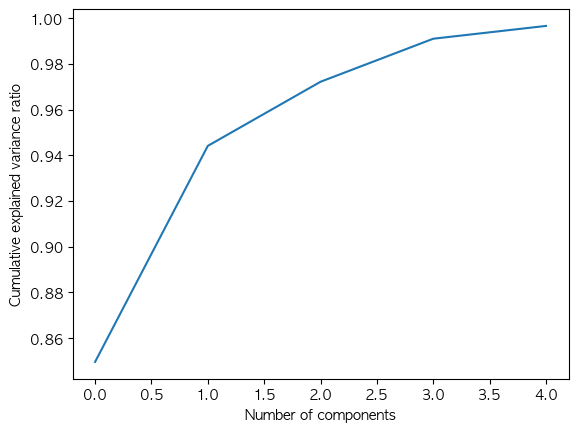

In [7]:
# PCA 수행
pca = PCA(n_components=5)
pca_result = pca.fit_transform(scaled_data)

# 변환된 데이터의 크기를 출력합니다.
print('Transformed data shape:', pca_result.shape)

# 변환된 데이터의 처음 5개 샘플을 출력합니다.
print('Transformed data:\n', pca_result[:5])

# 설명된 분산의 비율을 확인합니다.
explained_variance_ratio = pca.explained_variance_ratio_
print('Explained variance ratio:', explained_variance_ratio)

# 누적 설명 분산 비율을 계산합니다.
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print('cumulative_variance_ratio:', cumulative_variance_ratio)

# 누적 설명 분산 비율을 그래프로 나타냅니다.
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()


### pca heatmap

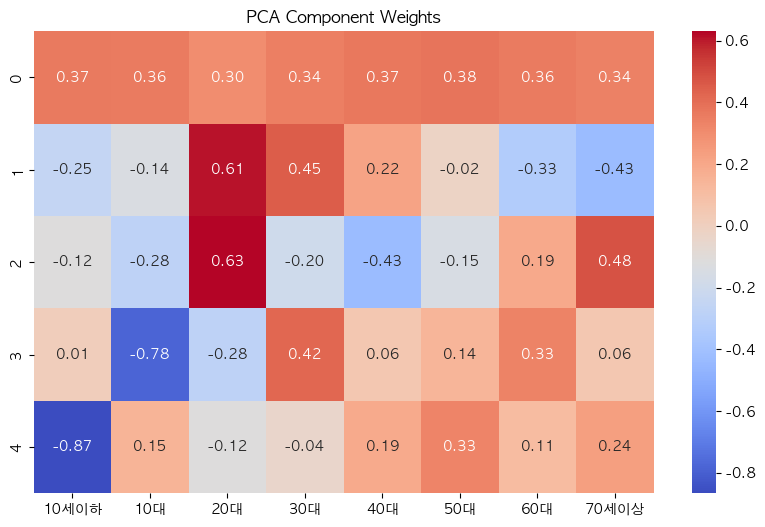

In [8]:
weights = pca.components_
n_components, n_features = weights.shape

# 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(weights, cmap='coolwarm', annot=True, fmt='.2f', xticklabels=df.columns)
plt.title('PCA Component Weights')
plt.show()


In [9]:
print(pca.components_)

[[ 0.36702513  0.35864488  0.3016397   0.34465547  0.36737575  0.37970933
   0.36074898  0.34294104]
 [-0.25031218 -0.14012433  0.60784846  0.44966444  0.21990992 -0.02303598
  -0.3342117  -0.4306305 ]
 [-0.115461   -0.27617223  0.63034899 -0.19727763 -0.42877437 -0.15167781
   0.19429487  0.47909835]
 [ 0.01124116 -0.77936457 -0.27921195  0.42078472  0.05684178  0.14410849
   0.33215355  0.05586761]
 [-0.86679031  0.14566597 -0.11649759 -0.04360969  0.1886207   0.32767486
   0.11419809  0.23662776]]


In [10]:
pca = PCA(n_components=2)
X_scaled = StandardScaler().fit_transform(data)
X_pca = pca.fit_transform(X_scaled)

## 엘보우 포인트 / 실루엣 계수

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

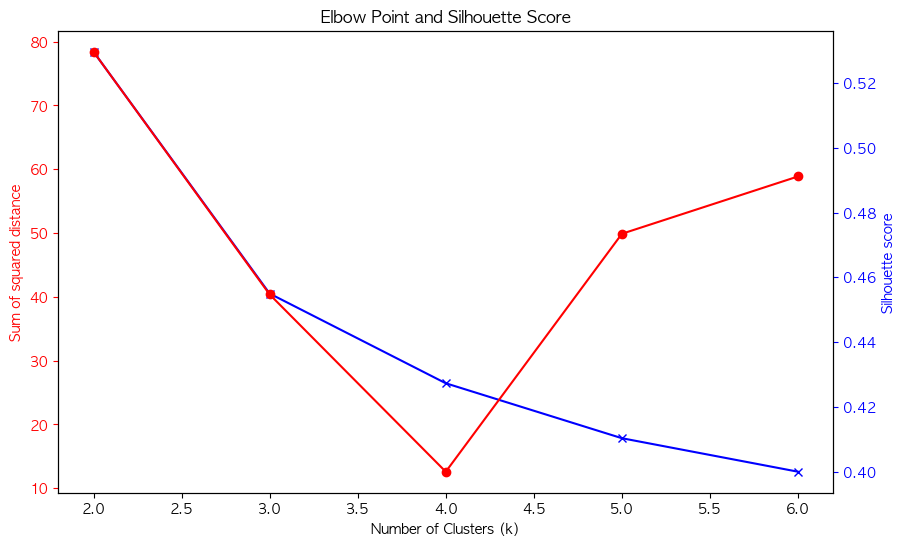

In [11]:
# 엘보우 포인트와 실루엣 계수를 저장할 리스트 초기화
sse = []
silhouette_coefficients = []

# 클러스터링을 위한 k 값 범위 설정
k_range = range(2, 7)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)
    
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_coefficients.append(score)

# 엘보우 포인트 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(k_range, sse, 'bx-')
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Sum of squared distance', color='r')
ax.set_title('Elbow Point and Silhouette Score')
ax.tick_params('y', colors='r')

# 실루엣 그래프 그리기
ax2 = ax.twinx()
ax2.plot(k_range, silhouette_coefficients, 'ro-')
ax2.set_ylabel('Silhouette score', color='b')
ax2.tick_params('y', colors='b')

plt.show()

## K-MEANS


### 군집 개수 3으로 설정

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


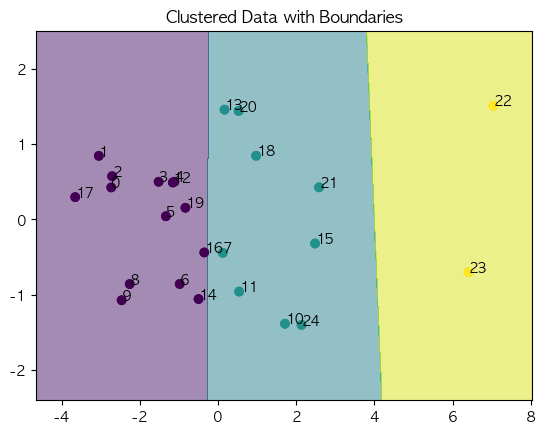

In [12]:
kmeans = KMeans(n_clusters=3, init='random', algorithm='auto')
kmeans.fit(X_pca)

#클러스터 라벨
cluster_labels = kmeans.labels_

#군집화 시각화
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the cluster labels for each point on the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the clustered data and the cluster boundaries
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
# Display index value on scatter plot
for i, point in enumerate(X_pca):
    plt.annotate(str(i), xy=point)
    
plt.title('Clustered Data with Boundaries')
plt.show()

#군집화 = 4

### 군집 개수 4로 설정

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


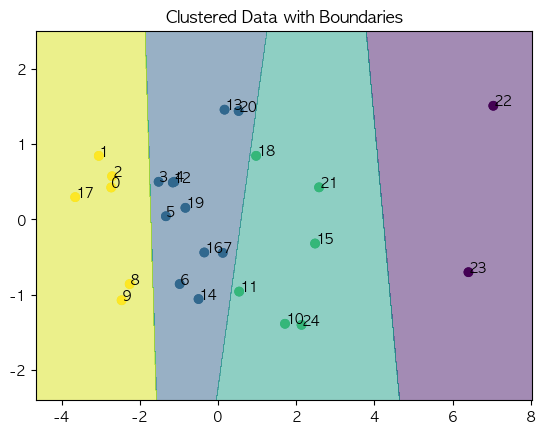

In [13]:
kmeans = KMeans(n_clusters=4, init='random', algorithm='auto')
kmeans.fit(X_pca)

#클러스터 라벨
cluster_labels = kmeans.labels_

#군집화 시각화
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the cluster labels for each point on the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the clustered data and the cluster boundaries
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
# Display index value on scatter plot
for i, point in enumerate(X_pca):
    plt.annotate(str(i), xy=point)
    
plt.title('Clustered Data with Boundaries')
plt.show()

#군집화 = 4

### 군집 개수 6으로 설정

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


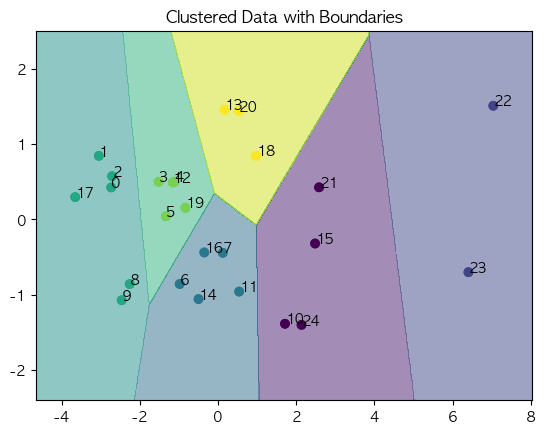

In [14]:
kmeans = KMeans(n_clusters=6, init='random', algorithm='auto')
kmeans.fit(X_pca)

#클러스터 라벨
cluster_labels = kmeans.labels_

#군집화 시각화
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the cluster labels for each point on the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the clustered data and the cluster boundaries
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
# Display index value on scatter plot
for i, point in enumerate(X_pca):
    plt.annotate(str(i), xy=point)
    
plt.title('Clustered Data with Boundaries')
plt.show()

#군집화 = 4

군집을 3,4로 설정 했을 때 군집 내 거리는 다소 멀고, 군집 간 거리는 가까웠음 
군집을 6으로 설정 했을 때는 군집 내 거리는 가깝고, 군집 간 거리는 다소 멀리 떨어져있었음

하지만 군집을 6으로 설정하는 것은 문제를 야기할 수 있음

**군집화 개수를 너무 높게 설정하면 안되는 이유**
- 모델이 데이터를 과도하게 세분화하여 일반화하기 어려워짐. 이는 훈련 데이터에 과적합되어 실제 데이터에서 성능이 떨어지는 문제가 발생할 수 있음.
- 군집화 개수가 많을수록 결과 해석이 어려워짐. 각각의 군집이 어떤 의미를 가지는지 파악하기 어려워짐
- 계산 비용을 증가시킬 수 있음 

=> 4로 설정

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


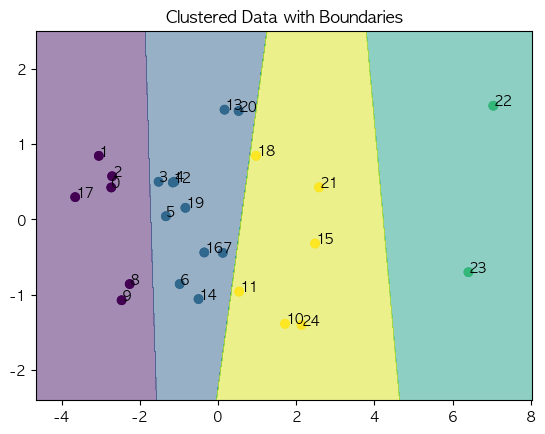

In [15]:
kmeans = KMeans(n_clusters=4, init='random', algorithm='auto')
kmeans.fit(X_pca)

#클러스터 라벨
cluster_labels = kmeans.labels_

#군집화 시각화
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the cluster labels for each point on the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the clustered data and the cluster boundaries
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
# Display index value on scatter plot
for i, point in enumerate(X_pca):
    plt.annotate(str(i), xy=point)
    
plt.title('Clustered Data with Boundaries')
plt.show()

#군집화 = 4

In [16]:
df['kmeans_label']=cluster_labels
df

,10세이하,10대,20대,30대,40대,50대,60대,70세이상,kmeans_label
자치구명,,,,,,,,,
종로구,10753.423470,17403.695254,48909.413625,46346.714660,47562.090160,44839.822897,28987.838337,27528.925107,0
중구,9452.687247,10570.163006,44287.278662,56819.077910,52610.119174,42718.524943,25650.597620,22286.085146,0
용산구,14341.223044,17688.419227,45062.410791,57081.920900,51073.500854,40400.134511,26671.727013,25612.230406,0
성동구,21082.969371,23154.545129,58551.789884,62900.092302,57473.746249,49606.010854,34232.677990,31594.262066,1
광진구,22582.412007,31212.709114,68331.699857,59894.262544,55318.091788,51136.390714,36325.101642,33330.126134,1
동대문구,20248.231634,25421.766523,64348.205405,50182.366532,52000.781171,48992.066106,37454.221727,40210.398243,1
중랑구,24655.954159,26707.462948,43973.321921,53259.856269,52831.064882,56375.807213,44446.150268,43396.239650,1
성북구,31175.679759,41532.119455,67329.526859,55464.420952,63195.670873,61072.938221,42887.092214,47499.439709,1
강북구,17628.699096,22522.662590,38317.087393,35454.503925,41484.759941,45234.834256,35032.565307,40686.839469,0


## GMM(GaussianMixture)

[군집] 가우시안 혼합 모델
https://lets-start-data.tistory.com/25

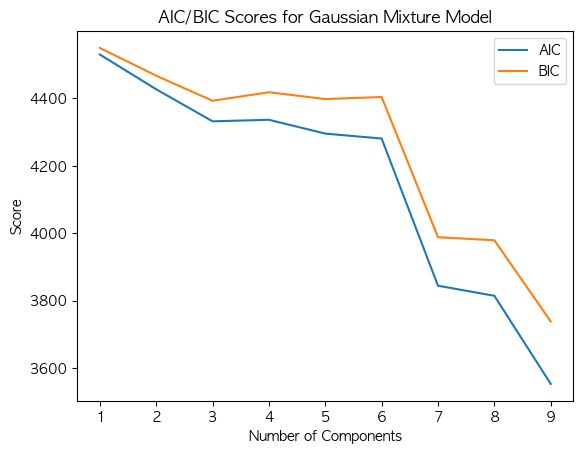

In [17]:
n_components_range = range(1, 10)
aic_values = []
bic_values = []
for n_components in n_components_range:
    #model = GaussianMixture(n_components=n_components, random_state=0) -> 오류발생
    model = GaussianMixture(n_components=n_components, covariance_type='diag', random_state=0)
#covariance_type을 변경하니 해결됨 ->diag 
    model.fit(data)  # X는 클러스터링할 데이터입니다.
    aic = model.aic(data)
    bic = model.bic(data)
    aic_values.append(aic)
    bic_values.append(bic)

#AIC와 BIC 값을 플롯에 표시합니다.
plt.plot(n_components_range, aic_values, label='AIC')
plt.plot(n_components_range, bic_values, label='BIC')

# 플롯의 스타일과 레이블 등을 설정합니다.
plt.title('AIC/BIC Scores for Gaussian Mixture Model')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend()

# 그래프를 보여줍니다.
plt.show()

정보 조건이 최소가 되는 지점을 찾아야함 -> 3에서 값이 완만해지고 6에서 값이 가파르게 내려감<br>
=> 6으로 설정 시 과적합 문제가 발생할 수 있으므로 3으로 군집을 선택

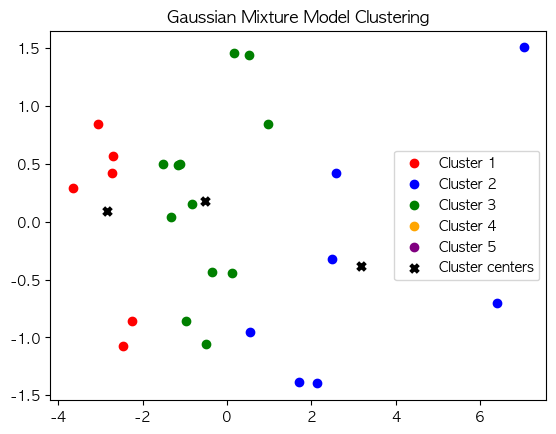

In [18]:
# gmm 모델 인스턴스화
gmm = GaussianMixture(n_components=3, random_state=42)

# 모델 학습
gmm.fit(X_pca)

# 클러스터 예측
centers = gmm.means_

labels = gmm.predict(X_pca)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_pca)

colors = ['red', 'blue', 'green', 'orange', 'purple']

fig, ax = plt.subplots()

for i in range(5):
    ax.scatter(pca_result[labels == i, 0], pca_result[labels == i, 1], color=colors[i], label=f"Cluster {i+1}")
ax.scatter(centers[:, 0], centers[:, 1], color='black', marker='x', s=30, linewidth=3, label="Cluster centers")

# Chart settings
ax.set_title('Gaussian Mixture Model Clustering')
ax.legend()
plt.show()
# 1 11 2

k-means와 마찬가지로 군집을 4로 설정

In [19]:
df['gmm_labels']=labels
df

,10세이하,10대,20대,30대,40대,50대,60대,70세이상,kmeans_label,gmm_labels
자치구명,,,,,,,,,,
종로구,10753.423470,17403.695254,48909.413625,46346.714660,47562.090160,44839.822897,28987.838337,27528.925107,0,0
중구,9452.687247,10570.163006,44287.278662,56819.077910,52610.119174,42718.524943,25650.597620,22286.085146,0,0
용산구,14341.223044,17688.419227,45062.410791,57081.920900,51073.500854,40400.134511,26671.727013,25612.230406,0,0
성동구,21082.969371,23154.545129,58551.789884,62900.092302,57473.746249,49606.010854,34232.677990,31594.262066,1,2
광진구,22582.412007,31212.709114,68331.699857,59894.262544,55318.091788,51136.390714,36325.101642,33330.126134,1,2
동대문구,20248.231634,25421.766523,64348.205405,50182.366532,52000.781171,48992.066106,37454.221727,40210.398243,1,2
중랑구,24655.954159,26707.462948,43973.321921,53259.856269,52831.064882,56375.807213,44446.150268,43396.239650,1,2
성북구,31175.679759,41532.119455,67329.526859,55464.420952,63195.670873,61072.938221,42887.092214,47499.439709,1,2
강북구,17628.699096,22522.662590,38317.087393,35454.503925,41484.759941,45234.834256,35032.565307,40686.839469,0,0


## PAM (Patitioning Around Medoids)

- PAM(Partitioning Around Medoids) 군집분석은 중앙점(medoid)을 이용하여 N개의 모든 데이터를 최종 K개의 군집으로 군집화시키는 방법임.

- PAM 군집분석은 K-Means 군집분석와 유사하나 평균을 사용하는 K-means 군집분석보다 이상치에 덜 민감하는한 방법으로 알려져 있음.

[출처] 7.52 R에서 PAM(Patitioning Around Medoids) 군집분석 실시하기|작성자 아이리스
https://blog.naver.com/PostView.naver?blogId=pmw9440&logNo=222152602194

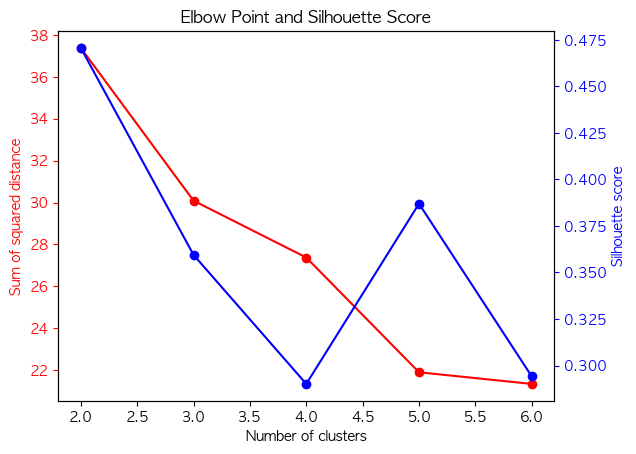

In [20]:
# k-medoids 알고리즘 적용
elbow_scores = []
silhouette_scores = []
for n_clusters in range(2, 7):
    kmedoids = KMedoids(n_clusters=n_clusters).fit(X_pca)
    elbow_scores.append(kmedoids.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmedoids.labels_))

# 엘보우 포인트와 실루엣 값을 그래프에 시각화
fig, ax1 = plt.subplots()

# 엘보우 포인트 그래프
ax1.plot(range(2, 7), elbow_scores, 'o-', color='r')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Sum of squared distance', color='r')
ax1.tick_params('y', colors='r')

# 실루엣 값 그래프
ax2 = ax1.twinx()
ax2.plot(range(2, 7), silhouette_scores, 'o-', color='b')
ax2.set_ylabel('Silhouette score', color='b')
ax2.tick_params('y', colors='b')

plt.title('Elbow Point and Silhouette Score')
plt.show()

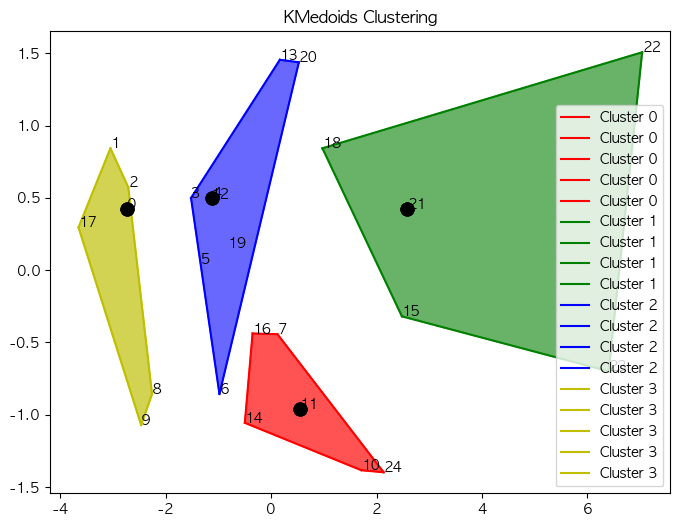

In [21]:
# Assume X_pca is your data
# ...

# Create and train KMedoids models
kmedoids = KMedoids(n_clusters=4, random_state=0)
y_kmedoids = kmedoids.fit_predict(X_pca)

# Define cluster colors
colors = ['r', 'g', 'b', 'y']

# Create subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Create a list to store Line2D objects for the legend
legend_lines = []

# Plot each cluster with different color and label
for i in range(4):
    cluster_points = X_pca[y_kmedoids == i]
    
    if len(cluster_points) >= 4:
        # Get indices of outermost points in the cluster
        hull = ConvexHull(cluster_points)
        outermost_points_idx = hull.vertices
        
        # Plot lines connecting outermost points and fill interior space
        n_points = len(outermost_points_idx)
        for j in range(n_points):
            line = ax.plot([cluster_points[outermost_points_idx[j], 0], cluster_points[outermost_points_idx[(j+1)%n_points], 0]],
                           [cluster_points[outermost_points_idx[j], 1], cluster_points[outermost_points_idx[(j+1)%n_points], 1]], color=colors[i])
            ax.fill(cluster_points[outermost_points_idx, 0], cluster_points[outermost_points_idx, 1], color=colors[i], alpha=0.2)
            
            # Append Line2D object to the legend_lines list
            legend_lines.append(Line2D([0], [0], color=colors[i], label=f'Cluster {i}'))

        # Plot Medoids as black markers
        medoids = kmedoids.cluster_centers_
        ax.scatter(medoids[:, 0], medoids[:, 1], marker='o', s=50,
                   linewidths=3, color='black', zorder=10, label='Medoids')

# Add point indices to the plot
for i, point in enumerate(X_pca):
    ax.annotate(str(i), xy=point)

# Set plot title
ax.set_title('KMedoids Clustering')

# Add legend with custom lines
ax.legend(handles=legend_lines)

# Show the plot
plt.show()


In [22]:
df['y_kmedoids']=y_kmedoids
df

,10세이하,10대,20대,30대,40대,50대,60대,70세이상,kmeans_label,gmm_labels,y_kmedoids
자치구명,,,,,,,,,,,
종로구,10753.423470,17403.695254,48909.413625,46346.714660,47562.090160,44839.822897,28987.838337,27528.925107,0,0,3
중구,9452.687247,10570.163006,44287.278662,56819.077910,52610.119174,42718.524943,25650.597620,22286.085146,0,0,3
용산구,14341.223044,17688.419227,45062.410791,57081.920900,51073.500854,40400.134511,26671.727013,25612.230406,0,0,3
성동구,21082.969371,23154.545129,58551.789884,62900.092302,57473.746249,49606.010854,34232.677990,31594.262066,1,2,2
광진구,22582.412007,31212.709114,68331.699857,59894.262544,55318.091788,51136.390714,36325.101642,33330.126134,1,2,2
동대문구,20248.231634,25421.766523,64348.205405,50182.366532,52000.781171,48992.066106,37454.221727,40210.398243,1,2,2
중랑구,24655.954159,26707.462948,43973.321921,53259.856269,52831.064882,56375.807213,44446.150268,43396.239650,1,2,2
성북구,31175.679759,41532.119455,67329.526859,55464.420952,63195.670873,61072.938221,42887.092214,47499.439709,1,2,0
강북구,17628.699096,22522.662590,38317.087393,35454.503925,41484.759941,45234.834256,35032.565307,40686.839469,0,0,3


# 군집화 결과

In [23]:
clustering_result=df[['kmeans_label','gmm_labels','y_kmedoids']]
clustering_result
clustering_result=clustering_result.reset_index()
clustering_result

,자치구명,kmeans_label,gmm_labels,y_kmedoids
0,종로구,0,0,3
1,중구,0,0,3
2,용산구,0,0,3
3,성동구,1,2,2
4,광진구,1,2,2
5,동대문구,1,2,2
6,중랑구,1,2,2
7,성북구,1,2,0
8,강북구,0,0,3
9,도봉구,0,0,3


# 시각화

In [24]:
import folium
g= folium.Map(location = [37.5642135, 127.0016985],
                  tiles = 'openstreetmap', zoom_start=11.2)
g

## json파일 불러오기

In [25]:
import json
state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
# seoul_geo = json.load(open(jpath, encoding='utf-8'))


## KMEANS 시각화

In [26]:
m = folium.Map(location=[37.562225, 126.978555], tiles="OpenStreetMap", zoom_start=11)

m.choropleth(
    geo_data=state_geo,
    name='인당소득',
    data=clustering_result,
    columns=['자치구명', 'kmeans_label'],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'gray',
    legend_name = 'income'
)
m


/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


- k-means_0(하얀색) = 노원구, 은평구, 강서구, 영등포구, 서초구, 강동구 => 10세이하, 10대 값 높음

- k-means_1(하늘색) = 성동구, 광진구, 동대문구, 중랑구, 성북구, 서대문구, 마포구, 양천구, 구로구, 동작구, 관악구 => 전체적으로 값이 낮음

- k-means_2(연파) = 강남구, 송파구 => 값이 높은 특성

- k-means_3(진파) = 종로구, 중구, 용산구, 강북구, 도봉구, 금천구 => 값이 낮은 특성

In [27]:
kmeans=df.sort_values(by='kmeans_label',ascending=True)
kmeans

,10세이하,10대,20대,30대,40대,50대,60대,70세이상,kmeans_label,gmm_labels,y_kmedoids
자치구명,,,,,,,,,,,
종로구,10753.423470,17403.695254,48909.413625,46346.714660,47562.090160,44839.822897,28987.838337,27528.925107,0,0,3
중구,9452.687247,10570.163006,44287.278662,56819.077910,52610.119174,42718.524943,25650.597620,22286.085146,0,0,3
용산구,14341.223044,17688.419227,45062.410791,57081.920900,51073.500854,40400.134511,26671.727013,25612.230406,0,0,3
금천구,11259.211239,12251.652716,34323.963407,43701.410889,38234.002015,35652.319928,24682.365305,20676.499184,0,0,3
강북구,17628.699096,22522.662590,38317.087393,35454.503925,41484.759941,45234.834256,35032.565307,40686.839469,0,0,3
도봉구,18311.487214,23467.228422,30843.779078,33751.099023,38355.057568,43102.689205,35947.729630,38245.457017,0,0,3
관악구,22699.268142,28955.932949,105707.371572,87546.575768,66704.025235,59269.566239,43097.431082,46162.698160,1,2,2
동작구,25877.107397,29520.188384,68150.966313,59047.648985,56323.789763,50468.925345,37488.443219,40857.735289,1,2,2
구로구,29432.656213,28864.869905,49660.113474,67527.558473,67174.627279,59337.765311,43884.112611,42574.274292,1,2,0


In [28]:
df['kmeans_label']

자치구명
종로구     0
중구      0
용산구     0
성동구     1
광진구     1
동대문구    1
중랑구     1
성북구     1
강북구     0
도봉구     0
노원구     3
은평구     3
서대문구    1
마포구     1
양천구     1
강서구     3
구로구     1
금천구     0
영등포구    3
동작구     1
관악구     1
서초구     3
강남구     2
송파구     2
강동구     3
Name: kmeans_label, dtype: int32

## GMM 시각화

In [29]:
m = folium.Map(location=[37.562225, 126.978555], tiles="OpenStreetMap", zoom_start=11)

m.choropleth(
    geo_data=state_geo,
    name='인당소득',
    data=clustering_result,
    columns=['자치구명', 'gmm_labels'],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'gray',
    legend_name = 'income'
)
m


/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [30]:
gmm=df.sort_values(by='gmm_labels',ascending=True)
gmm

,10세이하,10대,20대,30대,40대,50대,60대,70세이상,kmeans_label,gmm_labels,y_kmedoids
자치구명,,,,,,,,,,,
종로구,10753.423470,17403.695254,48909.413625,46346.714660,47562.090160,44839.822897,28987.838337,27528.925107,0,0,3
중구,9452.687247,10570.163006,44287.278662,56819.077910,52610.119174,42718.524943,25650.597620,22286.085146,0,0,3
용산구,14341.223044,17688.419227,45062.410791,57081.920900,51073.500854,40400.134511,26671.727013,25612.230406,0,0,3
금천구,11259.211239,12251.652716,34323.963407,43701.410889,38234.002015,35652.319928,24682.365305,20676.499184,0,0,3
강북구,17628.699096,22522.662590,38317.087393,35454.503925,41484.759941,45234.834256,35032.565307,40686.839469,0,0,3
도봉구,18311.487214,23467.228422,30843.779078,33751.099023,38355.057568,43102.689205,35947.729630,38245.457017,0,0,3
강남구,52486.185057,93529.501284,123504.392625,157540.158060,164996.517442,111036.507645,65007.037901,62952.019071,2,1,1
서초구,42192.037768,54109.867148,78329.262385,100056.934065,111585.226059,82639.747873,49128.593470,47540.120500,3,1,1
강서구,43348.335169,44117.019758,74971.427095,99774.849945,92650.672798,74584.318315,56367.703260,58729.321228,3,1,1


## PAM 시각화

In [31]:
m = folium.Map(location=[37.562225, 126.978555], tiles="OpenStreetMap", zoom_start=11)

m.choropleth(
    geo_data=state_geo,
    name='인당소득',
    data=clustering_result,
    columns=['자치구명', 'y_kmedoids'],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'gray',
    legend_name = 'income'
)
m


/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [32]:
pam=df.sort_values(by='y_kmedoids',ascending=True)
pam

,10세이하,10대,20대,30대,40대,50대,60대,70세이상,kmeans_label,gmm_labels,y_kmedoids
자치구명,,,,,,,,,,,
강동구,41703.304480,51656.235982,57583.737449,76155.818733,86174.896097,74917.307802,60076.397874,60524.010323,3,1,0
구로구,29432.656213,28864.869905,49660.113474,67527.558473,67174.627279,59337.765311,43884.112611,42574.274292,1,2,0
성북구,31175.679759,41532.119455,67329.526859,55464.420952,63195.670873,61072.938221,42887.092214,47499.439709,1,2,0
양천구,32267.637642,51698.186475,40554.970975,48009.928533,63682.970733,55438.010276,39550.521241,40496.994956,1,2,0
노원구,35042.660001,57527.812314,64526.685203,59602.939020,74335.191328,75102.051970,56843.662306,60440.031331,3,1,0
은평구,31221.971936,39377.936707,55006.956898,64074.415459,69984.196694,65587.671392,49393.632465,53483.631273,3,1,0
강남구,52486.185057,93529.501284,123504.392625,157540.158060,164996.517442,111036.507645,65007.037901,62952.019071,2,1,1
서초구,42192.037768,54109.867148,78329.262385,100056.934065,111585.226059,82639.747873,49128.593470,47540.120500,3,1,1
영등포구,27076.729050,27688.860089,73822.201260,101470.767529,88995.693614,73220.384882,47843.306498,42934.839353,3,2,1



**개념 정리 잘됨**
[군집] 가우시안 혼합 모델
https://lets-start-data.tistory.com/25

클러스터링 실습 (1) (EDA,Sklearn)
https://tobigs.gitbook.io/tobigs/data-analysis/undefined-3/python-2-1

# 결론

- 10대 단위로 구분된 연령대별 데이터를 기계가 어떻게 학습할지 알고 싶었고, 비슷한 값을 가진 데이터끼리 군집화된 것을 확인 가능했음